In [147]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime, utils

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [148]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
gender_data = pd.read_csv("data/gender_submission.csv")

In [149]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [150]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [151]:
gender_data.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [152]:
datasets = [train, test, gender_data]

def check_null(dataset): 
    for i in datasets:
        print(i.isnull().sum())
        print("\n")

print(check_null(datasets))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


PassengerId    0
Survived       0
dtype: int64


None


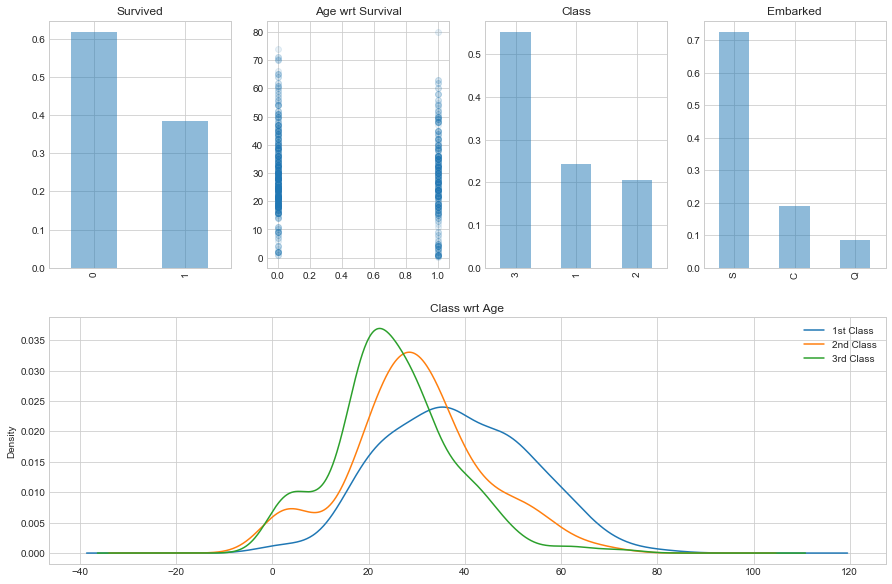

In [153]:
fig = plt.figure(figsize=(15,10))

plt.subplot2grid((2,4),(0,0))
train.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Survived")

plt.subplot2grid((2,4),(0,1))
plt.scatter(train.Survived, train.Age, alpha = 0.1)
plt.title("Age wrt Survival")

plt.subplot2grid((2,4),(0,2))
train.Pclass.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Class")

plt.subplot2grid((2,4),(0,3))
train.Embarked.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Embarked")

plt.subplot2grid((2,4),(1,0),colspan=4)
for x in [1,2,3]:
    train.Age[train.Pclass==x].plot(kind="kde")
plt.title("Class wrt Age")
plt.legend(("1st Class", "2nd Class", "3rd Class"))



plt.show()

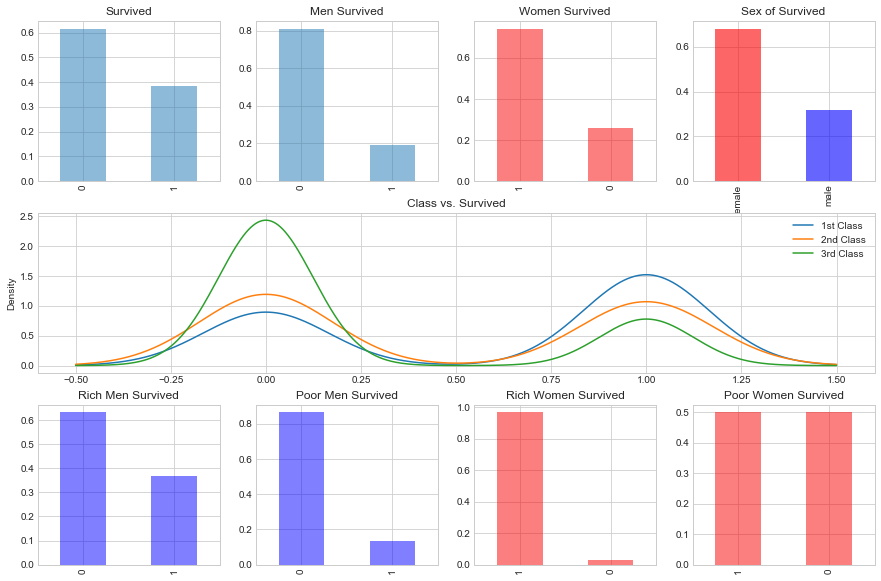

In [154]:
fig = plt.figure(figsize=(15,10))

plt.subplot2grid((3,4),(0,0))
train.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Survived")

plt.subplot2grid((3,4),(0,1))
train.Survived[train.Sex=="male"].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Men Survived")

plt.subplot2grid((3,4),(0,2))
train.Survived[train.Sex=="female"].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color = "#FA0000")
plt.title("Women Survived")

plt.subplot2grid((3,4),(0,3))
train.Sex[train.Survived==1].value_counts(normalize =True).plot(kind="bar", alpha = 0.6, color =["#FA0000", "b"])
plt.title("Sex of Survived")

plt.subplot2grid((3,4),(1,0),colspan=4)
for x in [1,2,3]:
    train.Survived[train.Pclass==x].plot(kind="kde")
plt.title("Class vs. Survived")
plt.legend(("1st Class", "2nd Class", "3rd Class"))

plt.subplot2grid((3,4),(2,0))
train.Survived[(train.Sex == "male") & (train.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha = 0.5, color = "b")
plt.title("Rich Men Survived")

plt.subplot2grid((3,4),(2,1))
train.Survived[(train.Sex == "male") & (train.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha = 0.5, color = "b")
plt.title("Poor Men Survived")

plt.subplot2grid((3,4),(2,2))
train.Survived[(train.Sex == "female") & (train.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha = 0.5, color = "#FA0000")
plt.title("Rich Women Survived")

plt.subplot2grid((3,4),(2,3))
train.Survived[(train.Sex == "female") & (train.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha = 0.5, color = "#FA0000")
plt.title("Poor Women Survived")

plt.show()

In [155]:
train["Hypothesis"] = 0

train.loc[train.Sex=="female","Hypothesis"] = 1
train["Result"] = 0
train.loc[train.Survived == train["Hypothesis"], "Result"] = 1

print(train["Result"].value_counts(normalize=True))

1    0.786756
0    0.213244
Name: Result, dtype: float64


In [156]:
def clean(data):
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].dropna().median())
    
    data.loc[data["Sex"]== "male", "Sex"] = 0
    data.loc[data["Sex"]== "female", "Sex"] = 1
    
    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"]== "S", "Embarked"] = 0
    data.loc[data["Embarked"]== "C", "Embarked"] = 1
    data.loc[data["Embarked"]== "Q", "Embarked"] = 2

In [157]:
clean(train)

target = train["Survived"].values
features = train[["Pclass", "Age", "Fare", "Embarked", "Sex", "SibSp", "Parch"]].values

classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(features, target)

print(classifier_.score(features,target))

0.8013468013468014


In [158]:
poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(features)

classifier_ = classifier.fit(poly_features, target)
print(classifier_.score(poly_features,target))

0.8047138047138047


In [159]:
## Trained on the entire dataset, we will be overfitting

decision_tree = tree.DecisionTreeClassifier(random_state = 1)
decision_tree_ = decision_tree.fit(features, target)

print(decision_tree_.score(features, target))

## cross_val_score reveals the black box tests
scores = model_selection.cross_val_score(decision_tree,features,target, scoring = "accuracy", cv=50)

print(scores, scores.mean)


##Generalized tree performs better in cross-validation (worse on first test)
generalized_tree = tree.DecisionTreeClassifier(
random_state = 1,
max_depth = 7,
min_samples_split = 2)

generalized_tree_ = generalized_tree.fit(features, target)
print(generalized_tree_.score(features, target))
scores = model_selection.cross_val_score(generalized_tree,features,target, scoring = "accuracy", cv=50)
print(scores, scores.mean)


0.9797979797979798
[0.66666667 0.61111111 0.66666667 0.88888889 0.94444444 0.94444444
 0.72222222 0.77777778 0.72222222 0.77777778 0.72222222 0.61111111
 0.72222222 0.77777778 0.55555556 0.83333333 1.         0.66666667
 0.77777778 0.77777778 0.88888889 0.77777778 0.88888889 0.72222222
 0.55555556 0.83333333 0.94444444 0.88888889 0.66666667 0.83333333
 0.72222222 0.66666667 0.88888889 0.94444444 0.88888889 0.77777778
 0.72222222 0.72222222 0.72222222 0.77777778 0.88888889 0.82352941
 0.70588235 0.82352941 0.82352941 0.70588235 0.82352941 0.82352941
 0.88235294 0.88235294] <built-in method mean of numpy.ndarray object at 0x1265786c0>
0.8787878787878788
[0.77777778 0.66666667 0.77777778 0.94444444 0.83333333 0.88888889
 0.61111111 0.83333333 0.88888889 0.88888889 0.72222222 0.66666667
 0.83333333 0.77777778 0.72222222 0.83333333 0.94444444 0.72222222
 0.94444444 0.83333333 0.88888889 0.83333333 0.83333333 0.88888889
 0.94444444 0.83333333 0.83333333 0.83333333 0.77777778 0.88888889
 0.72